## 3\. Thermal Equilibrium

### 3.1 Introduction

- 星雲の温度は光電離による加熱と、再結合および放射による冷却の釣り合いで決まる
- エネルギー $h\nu$ の光子が吸収されて水素が電離される場合、生成される光電子の初期エネルギーは $\frac{1}{2}mu^2 = h(\nu - \nu_0)$
  - 2章で述べたように、このようにして生成された光電子はすぐに thermalize される
- 再結合では、$\frac{1}{2}mu^2$ のエネルギーを持った熱電子が消える、すなわち平均としてはこの量のエネルギーが再結合ごとに失われる
- 新しく作られる光電子の平均エネルギーと、吸収される電子の平均エネルギーの差が、電離過程で得られる正味のエネルギーとなる
- 平衡状態では、この正味のエネルギーゲインは放射によるエネルギーロスと釣り合う
  - 放射の主成分は、イオンの電子による衝突励起に続いて起こる放射
  - 自由自由放射も放射冷却メカニズムの一つだが、エネルギーロスへの寄与は小さい

### 3.2 Energy Input by Photoionization

- 光電離によるエネルギーゲイン
  - $\displaystyle G(\mathrm{H}) = n(\mathrm{H}^0) \int_{\nu_0}^\infty \frac{4\pi J_\nu}{h\nu} h(\nu - \nu_0) a_\nu(\mathrm{H}^0) d\nu \ [\mathrm{erg~cm^{-3}~s^{-1}}]$
- 電離平衡を考えると、(2.8) 式を使って $n(\mathrm{H}^0)$ を消すことができる
  - $\displaystyle G(\mathrm{H}) = n_e n_p \alpha_A(\mathrm{H}^0, T) \frac{\int_{\nu_0}^\infty \frac{4\pi J_\nu}{h\nu} h(\nu - \nu_0) a_\nu(\mathrm{H}^0) d\nu}{\int_{\nu_0}^\infty \frac{4\pi J_\nu}{h\nu} a_\nu(\mathrm{H}^0) d\nu} = n_e n_p \alpha_A(\mathrm{H}^0, T) \frac{3}{2} kT_i$
  - この式から、新たに生まれる光電子の平均エネルギーは電離源の SED に依存するが、強度には依存しないことが分かる。
  - 光源が黒体放射 $J_\nu = B_\nu(T_*)$ の場合、$T_i \approx T_*$ となる。
- Table 3.1 に星のモデル大気を光源とした場合の、雲の深さ（光学的厚み）ごとの光電子の平均エネルギーがリストされている。
  - 閾値付近のエネルギーの光子が選択的に吸収されるため、より高エネルギーの光子ほど雲の深くまで侵入する
  - その結果、雲の深いところほど光電子のもつ平均エネルギーは高くなる

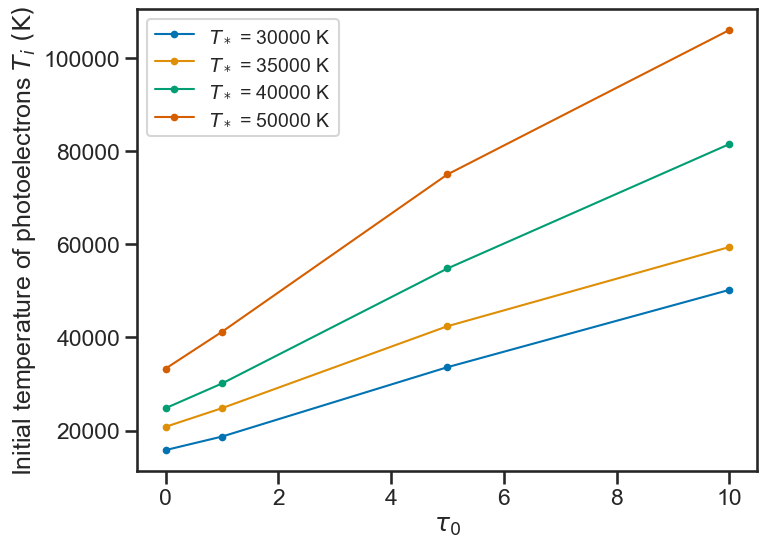

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Table 3.1 のプロット (光電子の平均エネルギー)
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set('talk', 'ticks', 'colorblind', font_scale=1.0, rc={"lines.linewidth": 1.5, 'grid.linestyle': '--'})
cmap = plt.get_cmap("tab10")

## 電荷交換による電離
ax = fig.add_subplot(111)
ax.set_xlabel(r'$\tau_0$')
ax.set_ylabel(r'Initial temperature of photoelectrons $T_i~(\mathrm{K})$')

tau0 = [0, 1, 5, 10]
T_i_30 = [1.58e4, 1.87e4, 3.36e4, 5.02e4]
T_i_35 = [2.08e4, 2.48e4, 4.24e4, 5.94e4]
T_i_40 = [2.48e4, 3.01e4, 5.48e4, 8.15e4]
T_i_50 = [3.33e4, 4.12e4, 7.50e4, 10.60e4]

ax.plot(tau0, T_i_30, '.-', label='$T_*$ = 30000 K')
ax.plot(tau0, T_i_35, '.-', label='$T_*$ = 35000 K')
ax.plot(tau0, T_i_40, '.-', label='$T_*$ = 40000 K')
ax.plot(tau0, T_i_50, '.-', label='$T_*$ = 50000 K')

ax.legend(fontsize=14)

### 3.3 Energy Loss by Recombination

- 再結合で失われる電子ガスの運動エネルギー
  - $L_R(\mathrm{H}) = n_e n_p kT \beta_A(\mathrm{H}^0, T) \ [\mathrm{erg~cm^{-3}~s^{-1}}]$
    - $\beta_A(\mathrm{H}^0, T) = \sum_{n=1}^\infty \beta_n(\mathrm{H}^0, T) = \sum_{n=1}^\infty \sum_{L=0}^{n-1} \beta_{nL}(\mathrm{H}^0, T) \ [\mathrm{cm^3~s^{-1}}]$
    - $\displaystyle \beta_{nL}(\mathrm{H}^0, T) = \frac{1}{kT} \int_0^\infty u\sigma_{nL}(\mathrm{H^0, T}) \frac{1}{2}mu^2 f(u) du$
      - これは実質、運動エネルギーで平均した再結合係数となっている（recombination cooling coefficient）
  - 再結合係数は $\propto u^{-2}$ の依存性があるため、低エネルギーの電子が優先的に再結合に使われる。このため、再結合される電子の平均エネルギーは $\frac{3}{2}kT$ よりいくらか小さい。
- 放射ロスのない純粋水素星雲の場合
  - $G(\mathrm{H}) = L_R(\mathrm{H})$
  - 解として得られる星雲温度は $T > T_i$ となる。なぜなら、遅い電子が選択的に再結合されることによる加熱が効くから。
- 上の例で on-the-spot 近似で輻射場を考慮した場合
  - $\displaystyle G_\mathrm{OTS}(\mathrm{H}) = n(\mathrm{H}^0) \int_{\nu_0}^\infty \frac{4\pi J_{\nu s}}{h\nu} h(\nu - \nu_0) a_\nu(\mathrm{H}^0) d\nu = n_e n_p \alpha_B(\mathrm{H}^0, T) \frac{\int_{\nu_0}^\infty \frac{4\pi J_{\nu s}}{h\nu} h(\nu - \nu_0) a_\nu(\mathrm{H}^0) d\nu}{\int_{\nu_0}^\infty \frac{4\pi J_{\nu s}}{h\nu} a_\nu(\mathrm{H}^0) d\nu}$
  - $L_\mathrm{OTS}(\mathrm{H}) = n_e n_p kT \beta_B(\mathrm{H}^0, T)$
    - ただし、$\beta_B(\mathrm{H}^0, T) = \sum_{n=2}^\infty \beta_n(\mathrm{H}^0, T)$
  - 熱平衡での on-the-spot 近似は、電離平衡の場合ほど正確ではない。理由は星と difuuse 輻射場の間の $h(\nu - \nu_0)$ の差がかなり大きいため（いまいちピンときていない）
    - iteration により精度を上げることが可能
- ヘリウムを加えた場合
  - $G = G(\mathrm{H}) + G(\mathrm{He})$
    - ここで $\displaystyle G(\mathrm{He}) = n_e n(\mathrm{He^+}) \alpha_A(\mathrm{He}^0, T) \frac{\int_{\nu_0}^\infty \frac{4\pi J_{\nu}}{h\nu} h(\nu - \nu_2) a_\nu(\mathrm{He}^0) d\nu}{\int_{\nu_0}^\infty \frac{4\pi J_{\nu}}{h\nu} a_\nu(\mathrm{He}^0) d\nu}$
  - $L_R = L_R(\mathrm{H}) + L_R(\mathrm{He})$
    - ここで $L_R(\mathrm{He}) = n_e n(\mathrm{He^+}) kT \beta_A(\mathrm{He}^0, T)$
- このように加熱率や冷却率は関連するイオンの密度に依存するため、密度の小さい重元素のこれらへの寄与は無視できる

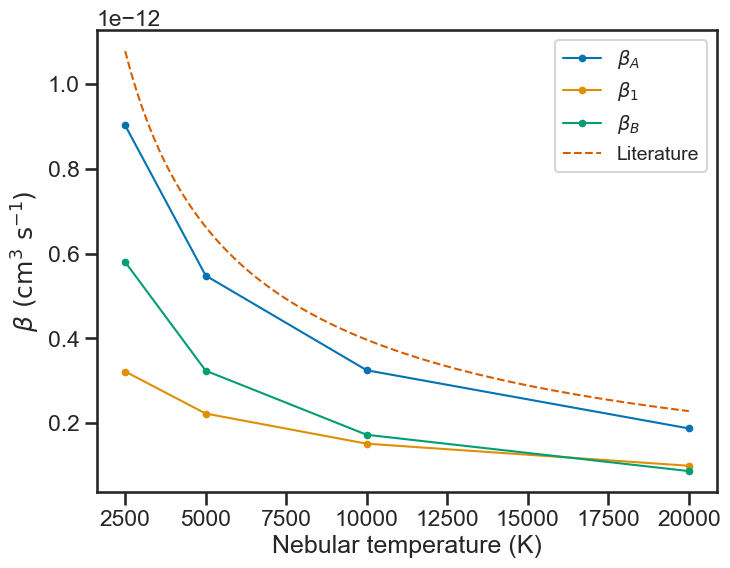

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Table 3.2 のプロット (再結合冷却係数)
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set('talk', 'ticks', 'colorblind', font_scale=1.0, rc={"lines.linewidth": 1.5, 'grid.linestyle': '--'})
cmap = plt.get_cmap("tab10")

## 電荷交換による電離
ax = fig.add_subplot(111)
ax.set_xlabel('Nebular temperature (K)')
ax.set_ylabel(r'$\beta~(\mathrm{cm^3~s^{-1}})$')

temp = [2500, 5000, 10000, 20000]
beta_A = [9.02e-13, 5.48e-13, 3.25e-13, 1.88e-13]
beta_1 = [3.22e-13, 2.23e-13, 1.52e-13, 1.00e-13]
beta_B = [5.80e-13, 3.24e-13, 1.73e-13, 8.75e-14]

ax.plot(temp, beta_A, '.-', label=r'$\beta_A$')
ax.plot(temp, beta_1, '.-', label=r'$\beta_1$')
ax.plot(temp, beta_B, '.-', label=r'$\beta_B$')

## Verner & Ferland (1996)
T = np.linspace(2500, 20000, 100)

T0 = 3.148 # K
T1 = 7.036e5 # K
a = 7.982e-11 # cm3/s
b = 0.7480
alpha_fit = a / ((T / T0)**0.5 * (1. + (T / T0)**0.5)**(1. - b) * (1. + (T / T1)**0.5)**(1. + b))

const_a = 1.00028519708435
const_b = -7.569939287228937e-6
const_c = 2.79188868562404e-8
const_d = -1.289820289839189e-10
const_e = 7.829204293134294e-12
gamma = const_a + const_b * T + const_c * T**1.5 + const_d * T**2 + const_e * T**2 * np.log(T) # LaMothe & Ferland (2001). Conversion from alpha to beta.

ax.plot(T, alpha_fit * gamma, '--', label='Literature')

ax.legend(fontsize=14)

### 3.4 Energy Loss by Free-Free Radiation

- 放射冷却の一種として、自由自由放射による冷却を考える
  - 次に述べる衝突励起輝線による放射に比べると寄与は小さいが、純粋な水素ガスでも起こる点が重要といえる
- $\displaystyle L_{FF}(Z) = 4\pi j_{ff} = \frac{2^5\pi e^6 Z^2}{3^{3/2}hmc^3} \left( \frac{2\pi kT}{m} \right)^{1/2} g_{ff} n_e n_+ \ [\mathrm{erg~cm^{-3}~s^{-1}}] = 1.42 \times 10^{-27} Z^2 T^{1/2} g_{ff} n_e n_+$
  - $n_+$ はイオンの数密度
- アバンダンスの関係で、やはり水素イオン $\mathrm{H}^+$ の寄与が支配的。
  - $\mathrm{He}^+$ も $Z=1$ なので、水素とあわせて $n_+ = n_p + n(\mathrm{He}^+)$ と書ける
- $g_{ff}$ は自由自由放射の Gaunt factor で、$g_{ff} \approx 1.3$.

### 3.5 Energy Loss by Collisionally Excited Line Radiation

- 放射冷却の主要源は、重元素イオン（$\mathrm{O^+, O^{++}, N^{+}}$, etc.）の低エネルギー準位への衝突励起
- 重元素のアバンダンスが小さいのにこの過程が有効な理由は、これらが $kT$ 程度の励起ポテンシャルの準位を持つのに対し、水素とヘリウムは遥かに高い励起ポテンシャルの準位しか持たないため
- 2準位系の例
  - 下準位1から上準位2への電子による衝突励起を考える
  - 衝突励起断面積
    - $\displaystyle \sigma_{12}(u) = \frac{\pi \hbar^2}{m^2 u^2} \frac{\Omega(1,2)}{\omega_1} \ \ \text{for} \ \ \frac{1}{2}mu^2 > \chi \quad (3.14)$
    - $\chi = h\nu_{21}$ は励起ポテンシャル
    - Coulomb focusing (自由電子の速度が小さいほど、クーロン引力でイオンにつかまりやすい) のため、$\sigma \propto u^{-2}$
    - 衝突強度 $\Omega(1,2)$ は $\chi$ 付近で一定
    - $\omega_1$ は下準位の統計的重み
- 衝突励起と脱励起のつりあい
  - $\omega_1 u_1^2 \sigma_{12}(u_1) = \omega_2 u_2^2 \sigma_{21}(u_2) \quad (3.15)$
    - ここで $\displaystyle \frac{1}{2}mu_1^2 = \frac{1}{2}mu_2^2 + \chi$
  - 導出
    - 詳細つりあいの原理により、下準位から上準位への衝突励起とその逆過程は釣り合う
      - $n_e n_1 u_1 \sigma_{12}(u_1) f(u_1) du_1 = n_e n_2 u_2 \sigma_{21}(u_2) f(u_2) du_2$
    - 熱平衡でのボルツマン方程式
      - $\displaystyle \frac{n_2}{n_1} = \frac{\omega_2}{\omega_1} \exp(-\chi/kT)$
    - これらを組み合わせると、(3.15) 式が導出される
  - 衝突脱励起の断面積
    - (3.14), (3.15) 式から次のように書ける
      - $\displaystyle \sigma_{21}(u_2) = \frac{\pi \hbar^2}{m^2 u_2^2} \frac{\Omega(1,2)}{\omega_2}$
- 衝突励起係数および衝突脱励起係数の導出
  - 単位体積、単位時間あたりのトータルの衝突脱励起率
    - $\displaystyle n_e n_2 q_{21} = n_e n_2 \int_0^\infty u\sigma_{21} f(u) du = n_e n_2 \left( \frac{2\pi}{kT} \right)^{1/2} \frac{\hbar^2}{m^{3/2}} \frac{\Upsilon(1,2)}{\omega_2} \ [\mathrm{cm^{-3}~s^{-1}}] = n_e n_2 \frac{8.629 \times 10^{-6}}{T^{1/2}} \frac{\Upsilon(1,2)}{\omega_2}$
  - $\Upsilon(1,2)$ は速度平均した衝突強度
    - $\displaystyle \Upsilon(1,2) = \int_0^\infty \Omega(1,2; E) \exp(-E/kT) d\left( \frac{E}{kT} \right)$
      - ここで $E = \frac{1}{2}mu_2^2$
  - 単位体積、単位時間あたりのトータルの衝突励起率
    - $\displaystyle q_{12} = \frac{\omega_2}{\omega_1} q_{21} \exp(-\chi/kT) = \frac{8.629 \times 10^{-6}}{T^{1/2}} \frac{\Upsilon(1,2)}{\omega_1} \exp(-\chi/kT) \ [\mathrm{cm^3~s^{-1}}]$
- 速度平均衝突強度 $\Upsilon$ の計算は、量子力学的に行う必要があり、Table 3.3 から 3.7 に $T=10000~\mathrm{K}$ での値の例がリストされている
  - Table 3.3 から 3.7 はそれぞれ最外殻電子が $2s, 2s^2, 2p, 2p^2, 2p^3$ のイオンに関するものとなっている
  - $T \approx 7500~\mathrm{K}$ では、衝突励起および衝突脱励起の断面積は $\sigma \approx 10^{-15} \Upsilon/\omega~\mathrm{cm^2}$ と覚えると良い
    - （光電離断面積 $a_{\nu_0} \approx 10^{-18}~\mathrm{cm^2}$ より３桁近くも大きい）
- 準位と（複数準位からなる）タームの間の平均衝突強度の関係
  - $\displaystyle \Upsilon(SLJ, S^\prime L^\prime J^\prime) = \frac{(2J^\prime + 1)}{(2S^\prime + 1)(2L^\prime + 1)} \Upsilon(SL, S^\prime L^\prime)$
    - $(2J^\prime + 1), (2S^\prime + 1)(2L^\prime + 1)$ はそれぞれ準位、タームの統計的重み
- 臨界密度
  - Table 3.3 から 3.5 の遷移は全て禁制遷移（本当？）
  - Table 3.8 から 3.14 に $2s^2, 2p, 3p, 2p^5~\&~3p^5, 2p^2~\&~3p^2, 2p^3~\&~3p^3, 2p^4~\&~3p^4$ のイオンで起こる放射性遷移の波長と遷移確率がリストされている
  - 低密度の極限では、全ての衝突励起は引き続いて光子の放射が起こり、冷却率は次のように書ける
    - $L_C = n_e n_1 q_{12} h\nu_{21}$
  - 高密度の場合
    - 衝突脱励起の影響が無視できなくなり、冷却率は下がる
    - 衝突励起と脱励起のつりあい
      - $n_e n_1 q_{12} = n_e n_2 q_{21} + n_2 A_{21}$
      - $\displaystyle \therefore \frac{n_2}{n_1} = \frac{n_e q_{12}}{A_{21}} \left[ \frac{1}{1+\frac{n_e q_{21}}{A_{21}}} \right]$
    - 冷却率
      - $\displaystyle L_C = n_2 A_{21} h\nu_{21} = n_e n_1 q_{12} h\nu_{21} \left[ \frac{1}{1+\frac{n_e q_{21}}{A_{21}}} \right]$
      - $n_e \rightarrow 0$ では低密度の場合の式と一致するが、$n_e \rightarrow \infty$ では次の熱力学平衡冷却率になる
        - $\displaystyle L_C \rightarrow n_1 \frac{\omega_2}{\omega_1} \exp(-\chi/kT) A_{21} h\nu_{21}$
  - 多準位系の場合
    - population の詳細釣り合い
      - $\sum_{j\ne i} n_j n_e q_{ji} + \sum_{j>i}n_j A_{ji} = \sum_{j \ne i} n_i n_e q_{ij} + \sum_{j < i}n_i A_{ij}$
    - 冷却率
      - $L_C = \sum_i n_i \sum_{j<i} A_{ij} h\nu_{ij} \ [\mathrm{erg~cm^{-3}~s^{-1}}]$
    - 準位 $i$ の臨界密度
      - $\displaystyle n_c(i) = \frac{\sum_{j<i} A_{ij}}{\sum_{j \ne i} q_{ij}}$
      - $n_e < n_c(i)$ では衝突脱励起の影響は無視できるが、$n_e > n_c(i)$ では重要になる（輝線が放射されなくなる）
  - Table 3.15 に臨界密度（@$T=10000~\mathrm{K}$）の例がリストされている
    - （臨界密度はラインごとではなく、準位ごとに決まる点に注意）
    - 試しに O III $^1D_2$ ($\lambda\lambda 4959, 5007$ の上準位) の臨界密度 $6.8 \times 10^5~\mathrm{cm^{-3}}$ を、5電子系を仮定して導出してみる
      - A 係数は３通り。Table 3.12 参照。
        - $A(^3P_2-^1D_2) + A(^3P_1-^1D_2) + A(^3P_0-^1D_2) = 2.0\times 10^{-2} + 6.8\times 10^{-3} + 1.7\times 10^{-6} \approx 2.7 \times 10^{-2}\ [\mathrm{s^{-1}}]$
      - 衝突遷移は $^3P$ への脱励起と $^1S$ への励起を考える。Table 3.6 参照。
        - $\displaystyle ^3P-^1D:\ q_{21} = \frac{8.629 \times 10^{-6}}{T^{1/2}} \frac{\Upsilon(1,2)}{\omega_2} = \frac{8.629 \times 10^{-6}}{10000^{1/2}} \frac{2.29}{2 \cdot 2 + 1} \approx 4.0 \times 10^{-8}\ [\mathrm{cm^3~s^{-1}}]$
        - $\displaystyle ^1D-^1S:\ q_{12} = \frac{8.629 \times 10^{-6}}{T^{1/2}} \frac{\Upsilon(1,2)}{\omega_1} \exp(-\chi/kT) = \frac{8.629 \times 10^{-6}}{10000^{1/2}} \frac{0.58}{2 \cdot 2 + 1} \exp(-2.84/0.86) \approx 3.7 \times 10^{-10}\ [\mathrm{cm^3~s^{-1}}]$
      - 従って $n_c(^1D) = 2.7 \times 10^{-2} / (4.0 \times 10^{-8} + 3.7 \times 10^{-10}) = 6.7 \times 10^5\ [\mathrm{cm}^{-3}]$
- <img src="../notebooks/files/illust01.png" width="600" style="border: 1px white solid;">

### 3.6 Energy Loss by Collisionally Excited Line Radiation of H

- 中性水素の衝突励起が輻射冷却に効くこともあるかもしれない
- 最も重要なのは、$1^2S$ から $2^2S$ への励起（10.2 eV）
- 中性なので衝突励起断面積は $u^{-2}$ の依存性を持たず、閾値での 0 から上昇し、閾値の数倍でピークをとり、そこから減少するという特性を持つ。
- しかし Table 3.16 にあるように、実際は温度に対してゆっくりにしか変化しない

### 3.7 Resulting Thermal Equilibrium

- 加熱と冷却のつりあい
  - $G = L_R + L_{FF} + L_C$
  - 低密度の場合
    - 上の式は全て電子密度 $n_e$ といくつかのイオンの密度に比例するため、結果として得られる温度はトータルの密度には依存しないが、重元素の相対アバンダンスには依存する。
  - 高密度の場合
    - 衝突脱励起が効くようになり、冷却率が下がる。結果、星雲の平衡温度は上昇する。
- 典型的な組成の H II region の場合 (Figure 3.2)
  - 仮定
    - 重元素アバンダンス：$n(\mathrm{O})/n(\mathrm{H}) = 7 \times 10^{-4}, n(\mathrm{Ne})/n(\mathrm{H}) = 9 \times 10^{-5}, n(\mathrm{N})/n(\mathrm{H}) = 9 \times 10^{-5}$
    - 電離度：重元素は 80% が一階電離、20% が二階電離。水素は $n(\mathrm{H}^0)/n(\mathrm{H}) = 1 \times 10^{-3}$.
  - 輝線放射冷却は $kT \ll \chi$ では小さく、その後急速に上昇して $kT \approx \chi$ でピークとなり、$kT > \chi$ で減少する（衝突励起率の依存性 $q_{12} \propto \exp(-\chi/kT)$ を反映）
  - 星雲温度 $T$ が大きくなるほど、冷却も強くなっている。これは励起ポテンシャルが $\chi > kT$ を満たす準位が存在する限り、続く。
  - 釣り合いの式は $G - L_R = L_{FF} + L_C$ のように変形したほうが便利。左辺は有効加熱率で、光電離過程で得られる（再結合による冷却を引いた）正味の加熱を表している。
  - 加熱と冷却の線が交わるところが星雲温度。図から分かるように、星の輻射場にはあまり依存しない。
- 高密度で衝突脱励起が効く場合（Figure 3.3）
  - [O II] λ3727 や [O III] 51 um は 20% 程度まで減っている
  - 高密度では衝突脱励起による冷却率の減少により、星雲温度は高くなる
  - 重元素アバンダンスが小さい場合も、冷却源が少なくなることにより星雲温度は高くなる
- 星雲照射面に近い高電離領域の場合
  - 惑星状星雲の中心付近等の場合、$\mathrm{H^0, O^+, O^{++}}$ は非常にわずかしか存在せず、$\mathrm{Ne^{+4}, C^{+3}}$ が主要な冷却源となり、星雲温度は $T = 2 \times 10^4~\mathrm{K}$ に達することもある

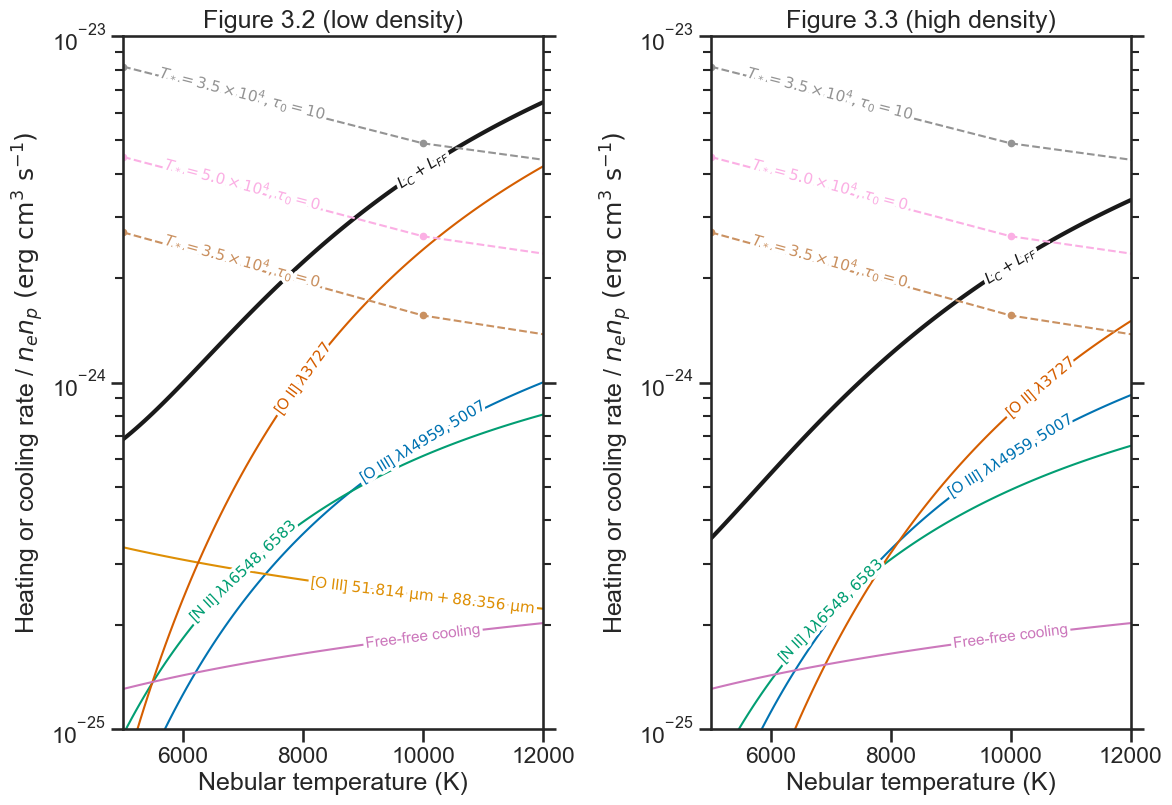

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from labellines import labelLines

from astropy import constants as const
from astropy import units as u

## Figure 3.2, 3.3 の再現 
fig = plt.figure(figsize=(13,9))
fig.subplots_adjust(wspace=0.4, hspace=0.3)
sns.set('talk', 'ticks', 'colorblind', font_scale=1.0, rc={"lines.linewidth": 1.5, 'grid.linestyle': '--'})
cmap = plt.get_cmap("tab10")

###############################
## Figure 3.2 (low density)
###############################

## 電荷交換による電離
ax = fig.add_subplot(121)
ax.set_title('Figure 3.2 (low density)')
ax.set_xlabel('Nebular temperature (K)')
ax.set_ylabel(r'Heating or cooling rate / $n_e n_p \ (\mathrm{erg~cm^3~s^{-1}})$')
ax.set_yscale('log')
ax.set_xlim(5000, 12000)
ax.set_ylim(1e-25, 1e-23)

ax.yaxis.set_ticks_position('both')

# L_C = n_e * n_1 * q_12 h * nu
#
# L_C / (n_e * n_p) = (n_1 / n_p) * q_12 * h * nu

temp = np.linspace(5000, 12000, 100) * u.K

## [O III] ^3P-^1D 4959 AA
n1_np = 7e-4 * 0.2
chi = 912. / 4959. * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = 8.629e-6 / temp.value**0.5 * 2.29 / (3. * 3.) * np.exp(-chi / kT.value)

ax.plot(temp.value, n1_np * q_12 * hnu.value, label='[O III] $\lambda\lambda 4959,5007$')

L1 = n1_np * q_12 * hnu.value

## [O III] ^3P1-^3P2 51.814 um
n1_np = 7e-4 * 0.2
chi = 912. / 51.814e4 * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = n1_np * 8.629e-6 / temp.value**0.5 * 1.29 / (3. * 1.) * np.exp(-chi / kT.value)

L2_1 = q_12 * hnu.value

## [O III] ^3P0-^3P1 88.356 um
n1_np = 7e-4 * 0.2
chi = 912. / 88.356e4 * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = n1_np * 8.629e-6 / temp.value**0.5 * 0.55 / (3. * 1.) * np.exp(-chi / kT.value)

L2_2 = q_12 * hnu.value

ax.plot(temp.value, L2_1 + L2_2, label='[O III] $51.814~\mathrm{\mu m} + 88.356~\mathrm{\mu m}$')

L2 = L2_1 + L2_2

## [N II] ^3P-^1D
n1_np = 9e-5 * 0.8
chi = 912. / 6548. * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = 8.629e-6 / temp.value**0.5 * 2.64 / (3. * 3.) * np.exp(-chi / kT.value)

ax.plot(temp.value, n1_np * q_12 * hnu.value, label='[N II] $\lambda\lambda 6548,6583$')

L3 = n1_np * q_12 * hnu.value

## [O II] ^4S-^2D
n1_np = 7e-4 * 0.8
chi = 912. / 3727. * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = 8.629e-6 / temp.value**0.5 * 1.34 / (3. * 1.) * np.exp(-chi / kT.value)

ax.plot(temp.value, n1_np * q_12 * hnu.value, label='[O II] $\lambda 3727$')

L4 = n1_np * q_12 * hnu.value

## Free-free cooling
g_ff = 1.3
L_FF = 1.42e-27 * temp.value**0.5 * g_ff

ax.plot(temp.value, L_FF, label='Free-free cooling')

## Total radiative cooling
ax.plot(temp.value, L1 + L2 + L3 + L4 + L_FF, 'k-', lw=3, label='$L_C + L_{FF}$')

## Recombination loss
t = np.array([5000, 10000, 20000])
beta_B = np.array([3.24e-13, 1.73e-13, 8.75e-14])

loss = beta_B * (const.k_B * t*u.K).to('erg')


## Gain
alpha_A = np.array([6.82e-13, 4.18e-13, 2.51e-13])

T_i = np.array([2.08e4, 3.33e4, 5.94e4]) # それぞれ (T_*, tau) = (35000, 0), (50000, 0), (35000, 10) from Table 3.1
labels = [r'$T_*=3.5\times10^4, \tau_0=0$', r'$T_*=5.0\times10^4, \tau_0=0$', r'$T_*=3.5\times10^4, \tau_0=10$']

for i in range(len(T_i)):
    gain = alpha_A * 3./2. * (const.k_B * T_i[i]*u.K).to('erg')
    ax.plot(t, gain - loss, '.--', label=labels[i])

#kT = (const.k_B * 2.08e4*u.K).to('erg')
#gain = alpha_A * 3./2. * kT

#ax.plot(t, gain - loss, '.-', label='$G - L_R$')

#ax.legend(fontsize=12)

lines = plt.gca().get_lines()
labelLines(lines, xvals=[10000, 10000, 7000, 8000, 10000, 10000, 7000, 7000, 7000],fontsize=11)


###############################
## Figure 3.3 (high density)
###############################

## 電荷交換による電離
ax = fig.add_subplot(122)
ax.set_title('Figure 3.3 (high density)')
ax.set_xlabel('Nebular temperature (K)')
ax.set_ylabel(r'Heating or cooling rate / $n_e n_p \ (\mathrm{erg~cm^3~s^{-1}})$')
ax.set_yscale('log')
ax.set_xlim(5000, 12000)
ax.set_ylim(1e-25, 1e-23)

ax.yaxis.set_ticks_position('both')

# L_C = n_e * n_1 * q_12 h * nu
#
# L_C / (n_e * n_p) = (n_1 / n_p) * q_12 * h * nu

temp = np.linspace(5000, 12000, 100) * u.K

## [O III] ^3P-^1D 4959 AA
n1_np = 7e-4 * 0.2
chi = 912. / 4959. * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = 8.629e-6 / temp.value**0.5 * 2.29 / (3. * 3.) * np.exp(-chi / kT.value)

q_21 = 8.629e-6 / temp.value**0.5 * 2.29 / (3. * 1.)
A_21 = 6.8e-3
n_e = 1e4

ax.plot(temp.value, n1_np * q_12 * hnu.value / (1. + n_e * q_21 / A_21), label='[O III] $\lambda\lambda 4959,5007$')

L1 = n1_np * q_12 * hnu.value / (1. + n_e * q_21 / A_21)

## [O III] ^3P1-^3P2 51.814 um
n1_np = 7e-4 * 0.2
chi = 912. / 51.814e4 * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = n1_np * 8.629e-6 / temp.value**0.5 * 1.29 / (3. * 1.) * np.exp(-chi / kT.value)

q_21 = 8.629e-6 / temp.value**0.5 * 0.55 / (3. * 1.)
A_21 = 9.7e-5
n_e = 1e4

L2_1 = q_12 * hnu.value / (1. + n_e * q_21 / A_21)

## [O III] ^3P0-^3P1 88.356 um
n1_np = 7e-4 * 0.2
chi = 912. / 88.356e4 * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = n1_np * 8.629e-6 / temp.value**0.5 * 0.55 / (3. * 1.) * np.exp(-chi / kT.value)

q_21 = 8.629e-6 / temp.value**0.5 * 0.55 / (3. * 1.)
A_21 = 2.7e-5
n_e = 1e4

L2_2 = q_12 * hnu.value / (1. + n_e * q_21 / A_21)

ax.plot(temp.value, L2_1 + L2_2, label='[O III] $51.814~\mathrm{\mu m} + 88.356~\mathrm{\mu m}$')

L2 = L2_1 + L2_2

## [N II] ^3P-^1D
n1_np = 9e-5 * 0.8
chi = 912. / 6548. * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = 8.629e-6 / temp.value**0.5 * 2.64 / (3. * 3.) * np.exp(-chi / kT.value)

q_21 = 8.629e-6 / temp.value**0.5 * 2.64 / (3. * 1.)
A_21 = 3.0e-3
n_e = 1e4

ax.plot(temp.value, n1_np * q_12 * hnu.value / (1. + n_e * q_21 / A_21), label='[N II] $\lambda\lambda 6548,6583$')

L3 = n1_np * q_12 * hnu.value / (1. + n_e * q_21 / A_21)

## [O II] ^4S-^2D
n1_np = 7e-4 * 0.8
chi = 912. / 3727. * 13.6 # eV
kT = (const.k_B * temp).to('eV')
hnu = (chi*u.eV).to('erg')
q_12 = 8.629e-6 / temp.value**0.5 * 1.34 / (3. * 1.) * np.exp(-chi / kT.value)

q_21 = 8.629e-6 / temp.value**0.5 * 1.34 / (3. * 1.)
A_21 = 3.6e-5 + 1.6e-4
n_e = 1e4

ax.plot(temp.value, n1_np * q_12 * hnu.value / (1. + n_e * q_21 / A_21), label='[O II] $\lambda 3727$')

L4 = n1_np * q_12 * hnu.value / (1. + n_e * q_21 / A_21)

## Free-free cooling
g_ff = 1.3
L_FF = 1.42e-27 * temp.value**0.5 * g_ff

ax.plot(temp.value, L_FF, label='Free-free cooling')

## Total radiative cooling
ax.plot(temp.value, L1 + L2 + L3 + L4 + L_FF, 'k-', lw=3, label='$L_C + L_{FF}$')

## Recombination loss
t = np.array([5000, 10000, 20000])
beta_B = np.array([3.24e-13, 1.73e-13, 8.75e-14])

loss = beta_B * (const.k_B * t*u.K).to('erg')


## Gain
alpha_A = np.array([6.82e-13, 4.18e-13, 2.51e-13])

T_i = np.array([2.08e4, 3.33e4, 5.94e4]) # それぞれ (T_*, tau) = (35000, 0), (50000, 0), (35000, 10) from Table 3.1
labels = [r'$T_*=3.5\times10^4, \tau_0=0$', r'$T_*=5.0\times10^4, \tau_0=0$', r'$T_*=3.5\times10^4, \tau_0=10$']

for i in range(len(T_i)):
    gain = alpha_A * 3./2. * (const.k_B * T_i[i]*u.K).to('erg')
    ax.plot(t, gain - loss, '.--', label=labels[i])


# T0 = 3.148 # K
# T1 = 7.036e5 # K
# a = 7.982e-11 # cm3/s
# b = 0.7480
# alpha_A_VF96 = a / ((temp.value / T0)**0.5 * (1. + (temp.value / T0)**0.5)**(1. - b) * (1. + (temp.value / T1)**0.5)**(1. + b))
# for i in range(len(T_i)):
#     gain = alpha_A_VF96 * 3./2. * (const.k_B * T_i[i]*u.K).to('erg')
#     ax.plot(temp.value, gain - loss, '.--', label=labels[i])


lines = plt.gca().get_lines()
labelLines(lines, xvals=[10000, 10000, 7000, 10500, 10000, 10000, 7000, 7000, 7000],fontsize=11)

from IPython.display import clear_output
clear_output()

- [O III] 51 + 88 um は、上準位 $^3P_2,~^3P_1$ の臨界密度がそれぞれ $3.6\times10^3, 5.1\times10^2\ \mathrm{cm^{-3}}$ と小さく、$n_e = 10^4\ \mathrm{cm^{-3}}$ の高密度ではほとんど放射されなくなっている。
- [O II] λ3727 の臨界密度は $3.4\times10^{-3} \mathrm{cm^{-3}}$ とおおよそ電子密度とコンパラであり、ファクターで下がっている
- [O III] λλ4959, 5007 の臨界密度は $6.8\times10^5\ \mathrm{cm^{-3}}$ と大きいため、高密度でもあまり変わっていない